In [ ]:
# Install necessary libraries:
# - hmmlearn: for Hidden Markov Model (HMM) training
# - python-dotenv: to manage environment variables securely (like API keys)
# - yfinance: to fetch historical price data from Yahoo Finance
# - requests: for making HTTP requests to APIs
# - scikit-learn: for machine learning models and vectorization
# - matplotlib: for plotting graphs and visualizations
# - textblob: for basic sentiment analysis
!pip install yfinance requests scikit-learn matplotlib textblob


In [ ]:
import requests  # For sending API requests
import yfinance as yf  # For fetching financial data
import matplotlib.pyplot as plt  # For plotting Bitcoin prices
from sklearn.feature_extraction.text import CountVectorizer  # For converting text to numerical vectors
from sklearn.naive_bayes import MultinomialNB  # For sentiment classification
from textblob import TextBlob  # For simple sentiment analysis
import random  # Used for randomness, but not used in this script


In [ ]:
# Fetch cryptocurrency-related news articles using NewsAPI.
# Combines the title and description of each article into one string.
def fetch_crypto_news(query="crypto", api_key="7405926986e74620a6ef52fe7b3de7ba", page_size=100):
    url = f"https://newsapi.org/v2/everything?q={query}&pageSize={page_size}&apiKey={api_key}"
    response = requests.get(url)
    data = response.json()
    return [article["title"] + " " + article["description"] for article in data["articles"] if article["description"]]

In [ ]:
# Fetch recent historical price data for a specific cryptocurrency (e.g., BTC-USD).
# Uses Yahoo Finance and returns only the "Close" prices.
def fetch_crypto_price(ticker="BTC-USD", period="1mo"):
    data = yf.download(ticker, period=period)
    return data["Close"]

In [ ]:
# Analyze a list of text strings and return 1 for positive sentiment and 0 for negative sentiment.
def analyze_sentiment_with_textblob(texts):
    sentiments = []
    for text in texts:
        blob = TextBlob(text)
        sentiment = 1 if blob.sentiment.polarity > 0 else 0
        sentiments.append(sentiment)
    return sentiments

In [ ]:
# Fetch additional crypto news articles, analyze them with TextBlob,
# and append them to the existing training dataset.
def generate_training_data(existing_texts, existing_labels, num_additional_samples=50):
    new_texts = []
    new_labels = []

    # Fetch a large batch of news articles
    news_articles = fetch_crypto_news(query="crypto", api_key="7405926986e74620a6ef52fe7b3de7ba", page_size=num_additional_samples)

    # Perform sentiment analysis on the new batch of news articles using TextBlob
    sentiment_results = analyze_sentiment_with_textblob(news_articles)

    # Add the new data to the existing sample
    # Extend training set
    new_texts.extend(news_articles)
    new_labels.extend(sentiment_results)

    # Append to existing training data
    existing_texts.extend(new_texts)
    existing_labels.extend(new_labels)

    return existing_texts, existing_labels


In [ ]:
# Expanded and manually labeled training data for sentiment analysis
texts = [
    # Positive
    "Bitcoin is booming again",
    "Ethereum hits new all time high",
    "Bitcoin price surges past expectations",
    "Institutional investors are buying crypto",
    "Major bank adopts blockchain technology",
    "Crypto adoption rises in emerging markets",
    "Visa announces support for crypto payments",
    "El Salvador successfully mines Bitcoin using volcano energy",
    "Bitcoin whales increase their holdings",
    "Crypto market sees steady recovery",
    "New ETF for Bitcoin approved by regulators",
    "Stablecoin gains traction for global payments",
    "Crypto-friendly legislation passes in major economy",
    "Tesla resumes accepting Bitcoin payments",
    "Sam Altman’s eyeball-scanning crypto startup gains momentum",
    "FDIC allows banks to engage in crypto without prior approval",

    # Negative
    "Crypto market crashes badly",
    "Investors lose billions in crypto panic",
    "Major hack hits crypto exchange",
    "Regulators crack down on crypto trading platforms",
    "Bitcoin falls below key support level",
    "Stablecoin depegged and collapses",
    "China bans all crypto transactions again",
    "SEC files lawsuit against major crypto exchange",
    "Interest rates hike spooks crypto investors",
    "Justice Department investigates crypto fraud ring",
    "NFT platform shuts down due to scam allegations",
    "Crypto miners flee country due to energy restrictions",
    "Director charged for blowing Netflix money on Dogecoin",
    "Interpol issues red notice for crypto entrepreneur",
    "Crypto exchange CEO arrested for money laundering"
]

labels = [
    1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,  # Good
    0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0     # Bad
]


In [ ]:
# Add 100 more auto-labeled news samples using TextBlob sentiment analysis
texts, labels = generate_training_data(texts, labels, num_additional_samples=100)

In [ ]:
# Vectorize the training text using bag-of-words model
vectorizer = CountVectorizer()
X_train = vectorizer.fit_transform(texts)
# Train the sentiment model using Naive Bayes
model = MultinomialNB()
model.fit(X_train, labels)

In [ ]:
# Predict whether a list of articles are positive (1) or negative (0) using the trained model
def predict_sentiment(news_list):
    X_test = vectorizer.transform(news_list)
    predictions = model.predict(X_test)
    results = list(zip(news_list, predictions))
    return results


In [ ]:
# Fetch latest news
news_articles = fetch_crypto_news(query="crypto", api_key="7405926986e74620a6ef52fe7b3de7ba", page_size=100)

In [ ]:
# Classify each article with trained model
sentiment_results = predict_sentiment(news_articles)

In [ ]:
# Print news article sentiment results
for article, sentiment in sentiment_results:
    print("::🟢:: GOOD" if sentiment == 1 else "::🔴:: BAD", "-", article)

::🟢:: GOOD - Trump’s DOJ will no longer prosecute cryptocurrency fraud The Trump administration is disbanding a Department of Justice unit dedicated to enforcing cryptocurrency fraud, ending what it calls âregulation by prosecution.â  In a memo obtained by The Washington Post, deputy attorney general Todd Blanche directed fe…
::🟢:: GOOD - Director Charged With Fraud After Blowing $4 Million of Netflix’s Cash on Dogecoin He was supposed to make a sci-fi epic about super intelligent clones. The FBI says he spent the money on crypto and cars.
::🔴:: BAD - Feds charge director with $11 million fraud over his unfinished Netflix show “The Strange $55 Million Saga of a Netflix Series You’ll Never See,” reported in 2023 by the New York Times, is now a criminal matter, as today prosecutors in the Southern District of New York charged director Carl Erik Rinsch with wire fraud, money launderin…
::🟢:: GOOD - Bitcoin in the bush - the crypto mine in remote Zambia Bitcoin miners will go to remote

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


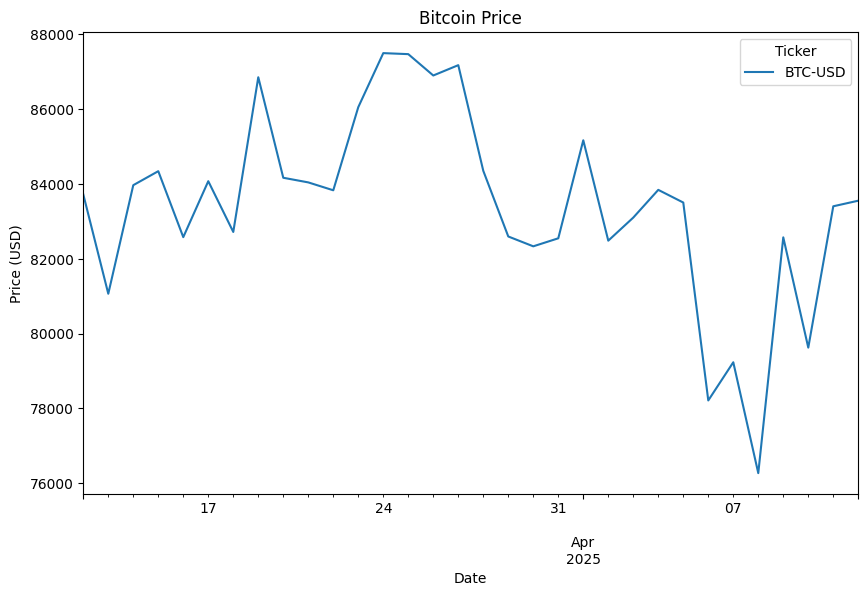

In [ ]:
# Fetch latest Bitcoin price data over last one month
btc_prices = fetch_crypto_price()

# Plot Bitcoin price data
btc_prices.plot(title="Bitcoin Price", figsize=(10, 6))
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.show()

# OPTIONAL: Compare sentiment with Bitcoin price changes
# We can do this step if we have timestamps from news articles and match them to Bitcoin price data (if available)